<a href="https://colab.research.google.com/github/lawalAfeez820/ML_colab_project/blob/main/Car_flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN----> CONVOLUTIONAL NEURAL NETWORK

## Do Machines have eyes ?

### Did you know you can teach your machine for it to recognise images?

####Just like the way you teach kids some new things around them as they grow, Machine can undergo the same phase and yield good results.

#### I trained a CONVOLUTIONAL NEURAL NETWORK on car and flower images by building a model from scratch and also fine-tuning VGG16 network for better performance. The model was able to learn pattern during training and was able to use this pattern during testing and gave good results. VGG16 network with 89% accuracy and the other model with 86% accuracy on test dataset


#### The model was built with tensorflow/keras framework. Decided to use Sequential model as more than one output is not required during model building.



In [ ]:
!apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!unzip /content/car_flower.zip

Archive:  /content/car_flower.zip
replace car_flower/test_set/car/fce7091377619593.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# importing the libraries

from keras.models import Sequential

from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

from keras.preprocessing.image import load_img,img_to_array,array_to_img

import os

import numpy as np

import matplotlib.pyplot as plt

import re



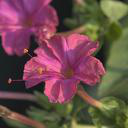

In [ ]:
#visualizing some of the image

flower_image=load_img("car_flower/training_set/flower/f0374e4cac2d1309.jpg")
flower_image

In [ ]:
# Model creation
from tensorflow import random
seed=43
np.random.seed(seed)
random.set_seed(seed)
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation="relu",))


model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(units=128,activation="relu"))

model.add(Dense(units=128,activation="relu"))







model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 7200)             

In [ ]:
# creating the training  and test set

from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True




)

test_gen=ImageDataGenerator(
    rescale=1./255,





)

In [ ]:
train_data=train_gen.flow_from_directory("/content/car_flower/training_set",target_size=(64, 64),class_mode="binary",batch_size=8)

test_data=train_gen.flow_from_directory("/content/car_flower/test_set",target_size=(64, 64),class_mode="binary",batch_size=8)

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'car': 0, 'flower': 1}

In [ ]:
model.fit(train_data,steps_per_epoch=len(train_data)//8
,epochs=10,validation_data=test_data,validation_steps=len(test_data)//8,shuffle=False)

Epoch 1/10
42/42 [==============================] - 3s 72ms/step - loss: 0.5232 - accuracy: 0.7545 - val_loss: 0.5575 - val_accuracy: 0.7063
Epoch 2/10
42/42 [==============================] - 3s 72ms/step - loss: 0.4615 - accuracy: 0.8051 - val_loss: 0.4380 - val_accuracy: 0.7844
Epoch 3/10
42/42 [==============================] - 3s 72ms/step - loss: 0.4419 - accuracy: 0.8058 - val_loss: 0.4602 - val_accuracy: 0.8156
Epoch 4/10
42/42 [==============================] - 3s 72ms/step - loss: 0.4449 - accuracy: 0.7999 - val_loss: 0.4427 - val_accuracy: 0.8000
Epoch 5/10
42/42 [==============================] - 3s 71ms/step - loss: 0.4369 - accuracy: 0.8065 - val_loss: 0.4199 - val_accuracy: 0.8281
Epoch 6/10
42/42 [==============================] - 3s 70ms/step - loss: 0.3895 - accuracy: 0.8341 - val_loss: 0.4302 - val_accuracy: 0.7844
Epoch 7/10
42/42 [==============================] - 3s 72ms/step - loss: 0.4383 - accuracy: 0.7984 - val_loss: 0.4253 - val_accuracy: 0.7937
Epoch 8/10
42

In [ ]:
import keras
model.save("car_flower_plain.h5")
model=keras.models.load_model('/content/car_flower_plain.h5')

In [ ]:
from keras.applications.vgg16 import VGG16

vgg_model=VGG16()
last_layer=str(vgg_model.layers[-1])

model2=Sequential()

for layer in vgg_model.layers:

  if str(layer) != last_layer:

    layer.trainable=False

    model2.add(layer)

model2.add(Dense(1,activation="sigmoid"))

model2.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
train_data_for_vgg=train_gen.flow_from_directory("/content/car_flower/training_set",target_size=(224, 224),class_mode="binary",batch_size=4)

test_data_for_vgg=train_gen.flow_from_directory("/content/car_flower/test_set",target_size=(224, 224),class_mode="binary",batch_size=4)

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [ ]:
train_data_for_vgg.class_indices

{'car': 0, 'flower': 1}

In [ ]:
model2.fit(train_data_for_vgg,steps_per_epoch=len(train_data_for_vgg)//4
,epochs=5,validation_data=test_data_for_vgg,validation_steps=len(test_data_for_vgg)//4,shuffle=False)

Epoch 1/5
168/168 [==============================] - 41s 242ms/step - loss: 0.3935 - accuracy: 0.8214 - val_loss: 0.3210 - val_accuracy: 0.8452
Epoch 2/5
168/168 [==============================] - 51s 301ms/step - loss: 0.2953 - accuracy: 0.8750 - val_loss: 0.2723 - val_accuracy: 0.9003
Epoch 3/5
168/168 [==============================] - 41s 244ms/step - loss: 0.2512 - accuracy: 0.8973 - val_loss: 0.2487 - val_accuracy: 0.9033
Epoch 4/5
168/168 [==============================] - 41s 245ms/step - loss: 0.2554 - accuracy: 0.8850 - val_loss: 0.2636 - val_accuracy: 0.8988
Epoch 5/5
168/168 [==============================] - 40s 236ms/step - loss: 0.2528 - accuracy: 0.8899 - val_loss: 0.2477 - val_accuracy: 0.8914


In [ ]:
import keras
model2.save("car_flower_vgg.h5")
model2=keras.models.load_model('/content/car_flower_vgg.h5')

In [ ]:
path=load_img("/content/download.jfif",target_size=(224,224))
path=np.expand_dims(img_to_array(path),axis=0)
np.round(model2.predict(path)[0][0]).astype("int")

1

In [ ]:
#@title Default title text
# fUNCTION FOR MODEL TESTING

class_name={i:j for j,i in train_data.class_indices.items()}


import PIL

from PIL import Image

def predict(image_path,model):


  path1=load_img(image_path,target_size=(64,64))

  path2=load_img(image_path,target_size=(224,224))

  if model==model2:

    path=path2

  else:

     path=path1


  path=np.expand_dims(img_to_array(path),axis=0)

  predict=np.round(model.predict(path)[0][0]).astype("int")


  print(f"THIS IS A {class_name[predict].upper()}")

  return Image.open(image_path) ;







# TESTING WITH THE TWO MODEL

```



THIS IS A CAR


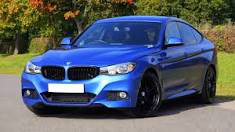

In [ ]:
predict("/content/download1.jfif",model2)

THIS IS A FLOWER


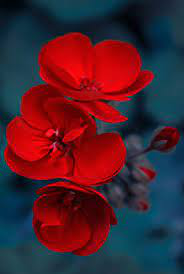

In [ ]:
predict("/content/download.jfif",model)

THIS IS A CAR


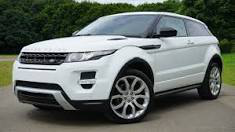

In [ ]:
predict("/content/download2.jpg",model)

THIS IS A FLOWER


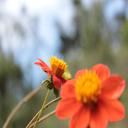

In [ ]:
predict("/content/test_image_2.jpg",model)

THIS IS A CAR


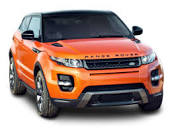

In [ ]:
predict("/content/download (1).jfif",model2)

THIS IS A CAR


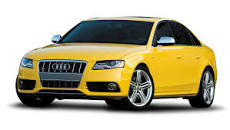

In [ ]:
predict("/content/download (2).jfif",model)

THIS IS A FLOWER


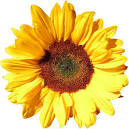

In [ ]:
predict("/content/download (3).jfif",model2)

THIS IS A FLOWER


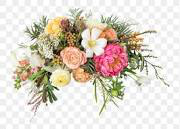

In [ ]:
predict("/content/download (4).jfif",model)